In [22]:
import pandas as pd
import joblib

In [23]:
ml_1_metrics = joblib.load("1_price_analysis/metrics.joblib")
ml_2_metrics = joblib.load("2_market_context_feature_analysis/metrics.joblib")
ml_3_metrics = joblib.load("3_other_feature_analysis/metrics.joblib")
ml_4_metrics = joblib.load("4_final_experiment/metrics.joblib")

In [24]:
all_metrics_val = {**ml_1_metrics, **ml_2_metrics, **ml_3_metrics, **ml_4_metrics}

In [5]:
# Create comparison DataFrame


def print_comparison_df(all_metrics_val, sort_by="accuracy", ascending=False, top_n=5):
    rows = []
    for key, metrics in all_metrics_val.items():
        window, col_group, model = key
        rep = metrics["classification_report"]
        rows.append(
            {
                "window": window,
                "col_group": col_group,
                "model": model,
                "accuracy": float(rep["accuracy"]),
                "precision_up": float(rep["Up"]["precision"]),
                "precision_down": float(rep["Down"]["precision"]),
                "recall_up": float(rep["Up"]["recall"]),
                "recall_down": float(rep["Down"]["recall"]),
                "f1_up": float(rep["Up"]["f1-score"]),
                "f1_down": float(rep["Down"]["f1-score"]),
                "macro_precision": float(rep["macro avg"]["precision"]),
                "macro_recall": float(rep["macro avg"]["recall"]),
                "macro_f1": float(rep["macro avg"]["f1-score"]),
                "weighted_precision": float(rep["weighted avg"]["precision"]),
                "weighted_recall": float(rep["weighted avg"]["recall"]),
                "weighted_f1": float(rep["weighted avg"]["f1-score"]),
                "auc": float(metrics["roc_auc"]["auc_score"]),
            }
        )

    df_comparison = pd.DataFrame(rows)
    print(f"\nTop {top_n} models by {sort_by}:")
    return df_comparison.sort_values(sort_by, ascending=ascending).head(top_n)


In [11]:
ex_1 = print_comparison_df(ml_1_metrics, sort_by="accuracy", ascending=False, top_n=10)
ex_1[["window", "col_group", "model", "accuracy", "precision_up", "macro_f1", "auc"]]


Top 10 models by accuracy:


,window,col_group,model,accuracy,precision_up,macro_f1,auc
39,48,price_close_volume,LGBMClassifier,0.570378,0.551351,0.536533,0.548651
7,16,price_close_volume,LGBMClassifier,0.546346,0.507067,0.512128,0.537756
22,32,price_close_volume,XGBClassifier,0.542423,0.500000,0.532020,0.536209
1,16,price_close_only,RandomForestClassifier,0.541932,0.499322,0.526422,0.525964
15,16,price_ohlcv,LGBMClassifier,0.541932,0.499040,0.500844,0.540124
26,32,price_ohlc,XGBClassifier,0.541442,0.498276,0.508750,0.526307
46,48,price_ohlcv,XGBClassifier,0.540461,0.497326,0.525844,0.536401
23,32,price_close_volume,LGBMClassifier,0.539971,0.495756,0.508363,0.532755
21,32,price_close_volume,RandomForestClassifier,0.538990,0.495172,0.522311,0.527100
47,48,price_ohlcv,LGBMClassifier,0.538009,0.491921,0.501899,0.529768


In [25]:
exp_2 = print_comparison_df(ml_2_metrics, sort_by="accuracy", ascending=False, top_n=10)
exp_2[["window", "col_group", "model", "accuracy", "precision_up", "macro_f1", "auc"]]


Top 10 models by accuracy:


,window,col_group,model,accuracy,precision_up,macro_f1,auc
27,16,price_gold,LGBMClassifier,0.565473,0.553776,0.513053,0.552675
18,16,price_iwm,XGBClassifier,0.564492,0.613065,0.457061,0.537855
47,32,price_amd,LGBMClassifier,0.557626,0.527928,0.522777,0.553615
63,32,price_iwm,LGBMClassifier,0.557626,0.592814,0.438556,0.526402
19,16,price_iwm,LGBMClassifier,0.557136,0.602740,0.431007,0.532969
11,16,price_spy,LGBMClassifier,0.554684,0.524366,0.513538,0.543145
17,16,price_iwm,RandomForestClassifier,0.554684,0.537764,0.479487,0.524757
89,48,price_amd,RandomForestClassifier,0.552722,0.516381,0.528184,0.537772
115,48,price_gold,LGBMClassifier,0.552722,0.535593,0.468664,0.532167
78,32,price_all_etf,XGBClassifier,0.552231,0.530120,0.476848,0.539810


In [26]:
exp_3 = print_comparison_df(ml_3_metrics, sort_by="accuracy", ascending=False, top_n=10)
exp_3[["window", "col_group", "model", "accuracy", "precision_up", "macro_f1", "auc"]]


Top 10 models by accuracy:


,window,col_group,model,accuracy,precision_up,macro_f1,auc
5,16,sentiment,RandomForestClassifier,0.563021,0.528302,0.548637,0.554165
3,16,technical,LGBMClassifier,0.551251,0.512821,0.532914,0.563508
7,16,sentiment,LGBMClassifier,0.550760,0.511989,0.533059,0.550248
35,48,insider_trading,LGBMClassifier,0.547818,0.509434,0.515973,0.538619
26,48,technical,XGBClassifier,0.547327,0.506443,0.535151,0.544110
11,16,insider_trading,LGBMClassifier,0.543404,0.501543,0.519142,0.538293
25,48,technical,RandomForestClassifier,0.542423,0.500000,0.517660,0.541280
19,32,sentiment,LGBMClassifier,0.540951,0.497890,0.523052,0.536397
6,16,sentiment,XGBClassifier,0.540951,0.498392,0.537623,0.539128
27,48,technical,LGBMClassifier,0.540461,0.497481,0.529443,0.544595


In [30]:
exp_4 = print_comparison_df(ml_4_metrics, sort_by="accuracy", ascending=False, top_n=10)
exp_4[["window", "col_group", "model", "accuracy", "precision_up", "macro_f1", "auc"]]


Top 10 models by accuracy:


,window,col_group,model,accuracy,precision_up,macro_f1,auc
13,16,nvda_technical,RandomForestClassifier,0.568939,0.544444,0.547571,0.579624
15,16,nvda_technical,LGBMClassifier,0.563301,0.538726,0.536030,0.567891
27,32,nvda_close_volume,LGBMClassifier,0.562788,0.540293,0.530991,0.556453
1,16,nvda_close_volume,RandomForestClassifier,0.561763,0.532915,0.540890,0.570887
61,48,nvda_technical,RandomForestClassifier,0.561251,0.534110,0.536249,0.562939
7,16,nvda_iwm,LGBMClassifier,0.558688,0.533962,0.524379,0.550569
43,32,all_handpicked,LGBMClassifier,0.557150,0.524962,0.538421,0.560259
29,32,nvda_iwm,RandomForestClassifier,0.554075,0.518828,0.540361,0.558656
16,16,all_handpicked,GaussianNB,0.553050,0.550201,0.461346,0.576420
57,48,nvda_gold,RandomForestClassifier,0.553050,0.512639,0.552553,0.572014


In [ ]:
ml_1_metrics

In [49]:
from matplotlib import pyplot as plt
import numpy as np


def plot_grouped_bars(matrix: pd.DataFrame, title: str, ylabel: str = "Accuracy", show_mean_bar=True):
    groups = list(matrix.index)  # x-axis: feature groups
    models = list(matrix.columns)  # each model is a bar series
    vals = matrix.values
    n_groups, n_models = vals.shape

    # include one extra bar for group mean or max if requested
    total_bars = n_models + (1 if show_mean_bar else 0)
    x = np.arange(n_groups)
    width = 0.8 / total_bars
    center_shift = (total_bars - 1) * width / 2

    plt.figure(figsize=(max(8, 1.6 * n_groups), 5))

    # plot bars per model
    for j, model_name in enumerate(models):
        plt.bar(x + j * width - center_shift, vals[:, j], width, label=model_name)

    # plot mean or max across models per feature group
    if show_mean_bar:
        row_mean = vals.mean(axis=1)
        j_mean = n_models
        plt.bar(x + j_mean * width - center_shift, row_mean, width, label="mean", alpha=0.7)

    # lines for groupwise and overall maxima
    overall_max = float(vals.max())
    plt.axhline(overall_max, linestyle=":", linewidth=1, label=f"overall max = {overall_max:.3f}")

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(x, groups)
    plt.ylim(0.44, 0.62)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

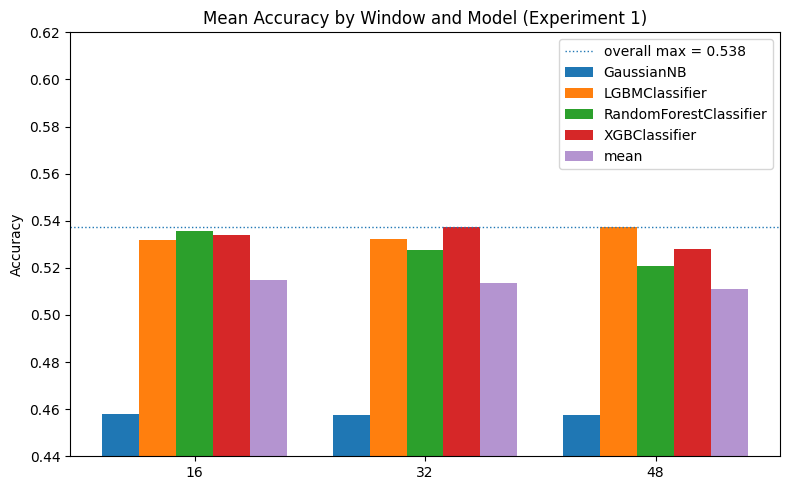

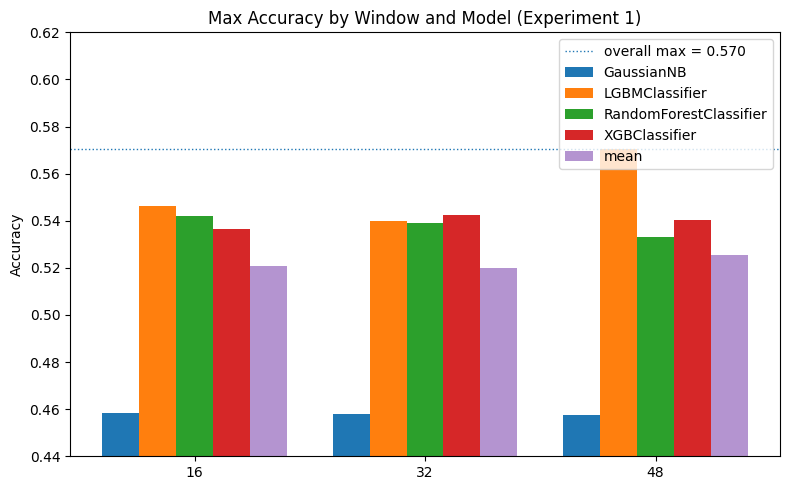

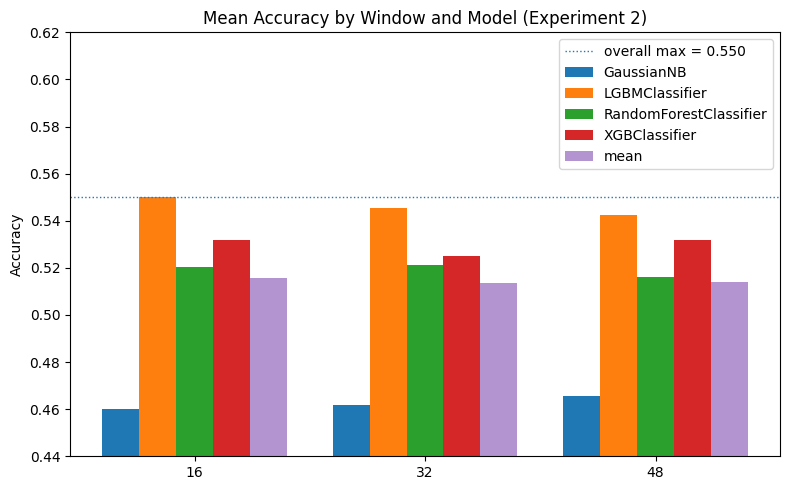

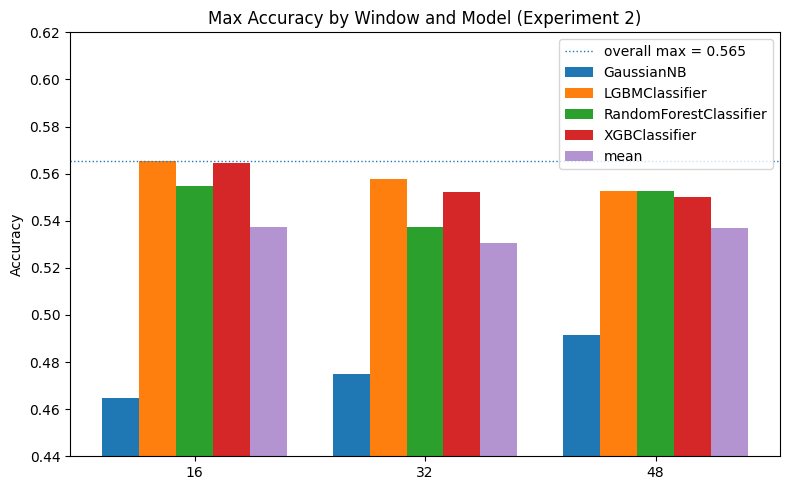

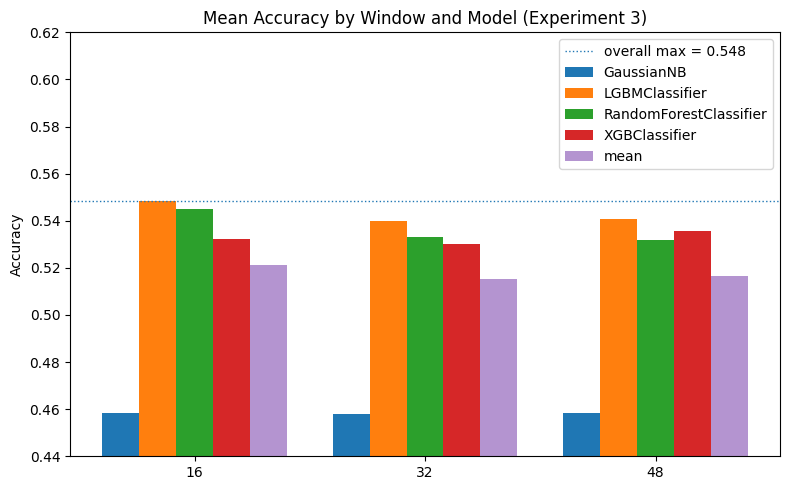

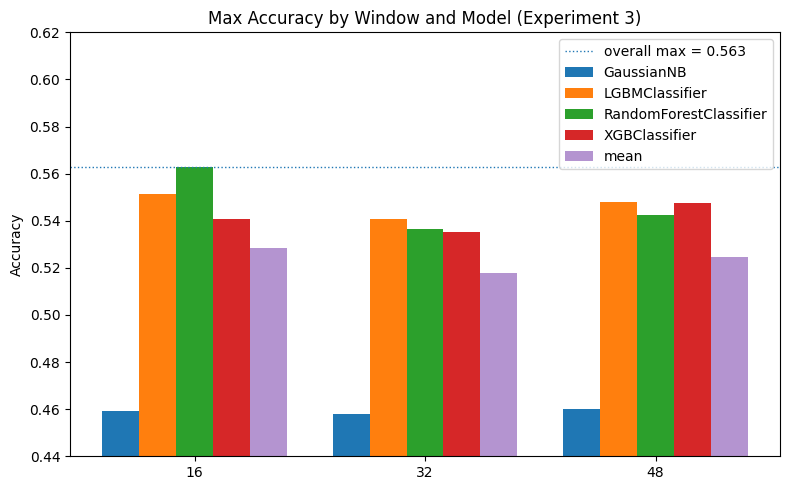

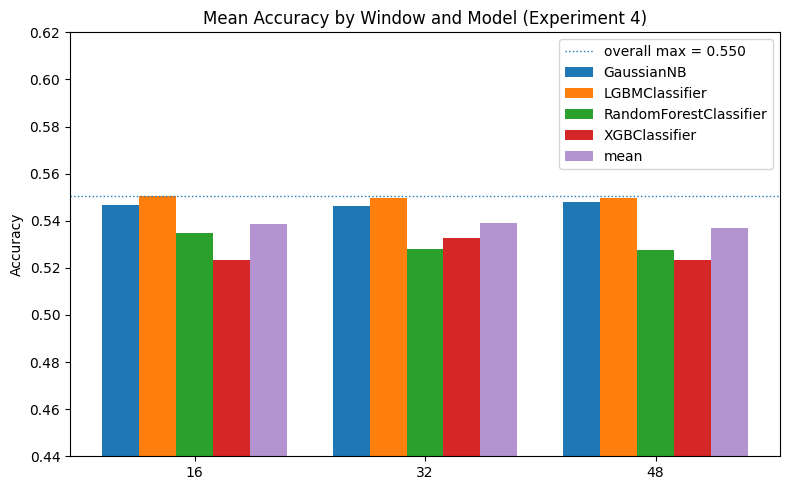

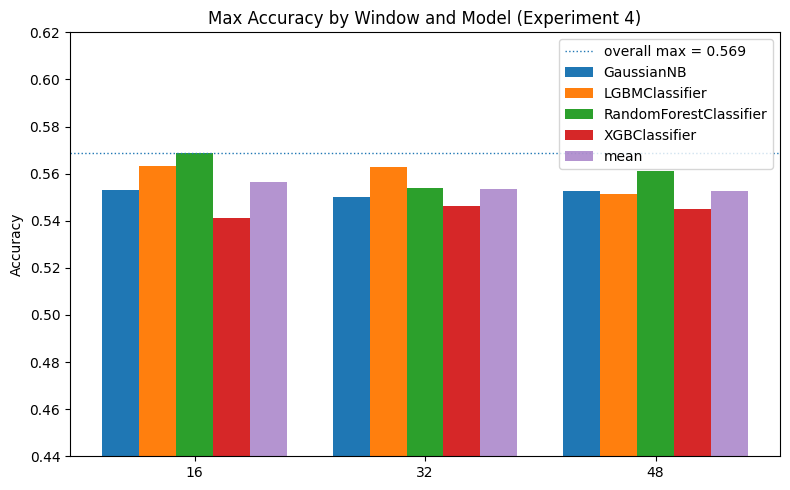

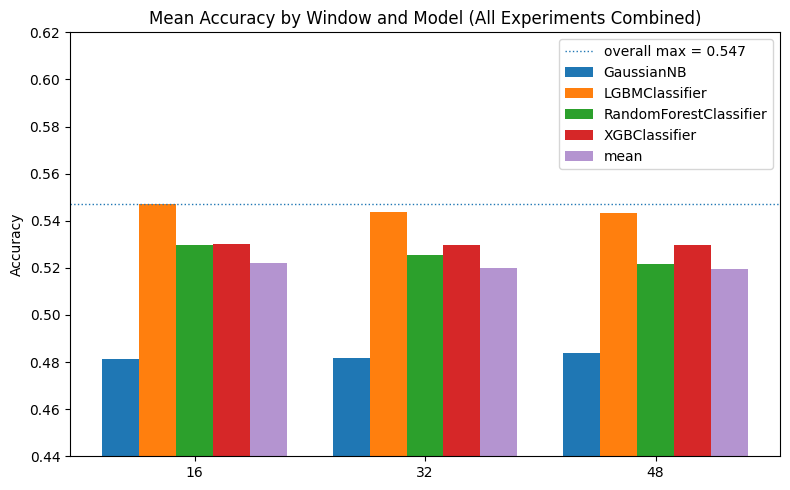

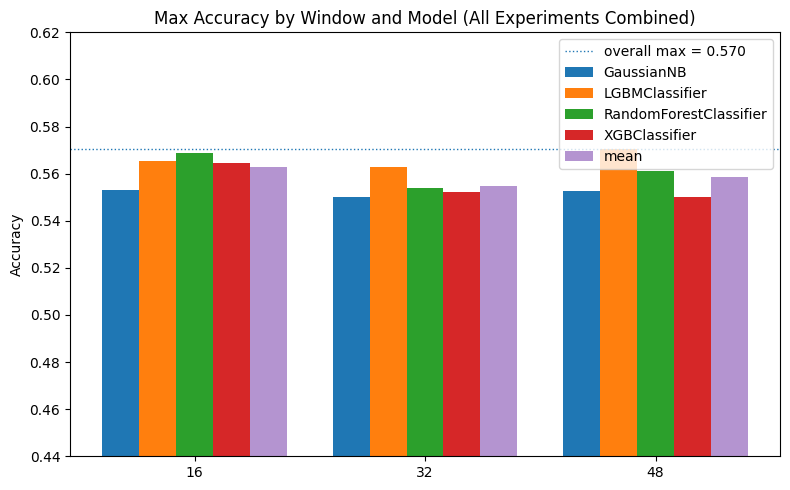

In [52]:
# Helper to build summary DataFrame from metrics dict
def build_summary_df(metrics_dict):
    rows = []
    for key, metrics in metrics_dict.items():
        window, col_group, model = key
        rep = metrics["classification_report"]
        rows.append(
            {
                "window": window,
                "col_group": col_group,
                "model": model,
                "accuracy": float(rep["accuracy"]),
            }
        )
    return pd.DataFrame(rows)


# Plot for each experiment
for i, metrics_dict in enumerate([ml_1_metrics, ml_2_metrics, ml_3_metrics, ml_4_metrics], start=1):
    df = build_summary_df(metrics_dict)
    pivot_mean = df.pivot_table(index="window", columns="model", values="accuracy", aggfunc="mean").sort_index()
    pivot_max = df.pivot_table(index="window", columns="model", values="accuracy", aggfunc="max").sort_index()
    plot_grouped_bars(pivot_mean, title=f"Mean Accuracy by Window and Model (Experiment {i})")
    plot_grouped_bars(pivot_max, title=f"Max Accuracy by Window and Model (Experiment {i})")

# Plot for combined metrics
all_metrics = {**ml_1_metrics, **ml_2_metrics, **ml_3_metrics, **ml_4_metrics}
df_all = build_summary_df(all_metrics)
pivot_mean_all = df_all.pivot_table(index="window", columns="model", values="accuracy", aggfunc="mean").sort_index()
pivot_max_all = df_all.pivot_table(index="window", columns="model", values="accuracy", aggfunc="max").sort_index()
plot_grouped_bars(pivot_mean_all, title="Mean Accuracy by Window and Model (All Experiments Combined)")
plot_grouped_bars(pivot_max_all, title="Max Accuracy by Window and Model (All Experiments Combined)")


In [66]:
best_roc = ml_4_metrics[(16, "nvda_technical", "RandomForestClassifier")]["roc_auc"]
best_roc.keys()

dict_keys(['fpr', 'tpr', 'auc_score'])

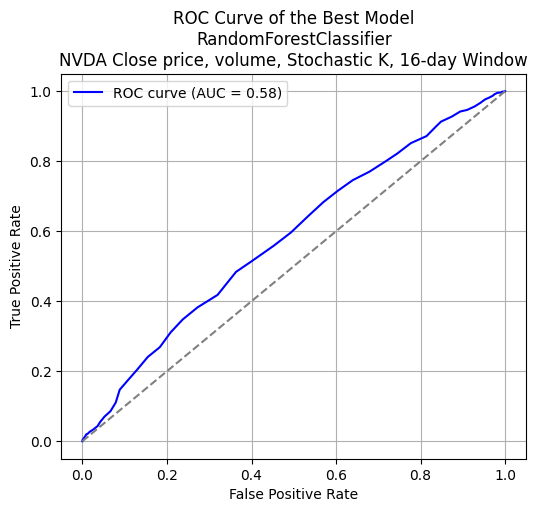

In [74]:
plt.figure(figsize=(6, 5))
plt.plot(best_roc["fpr"], best_roc["tpr"], color="blue", label=f"ROC curve (AUC = {best_roc['auc_score']:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve of the Best Model\nRandomForestClassifier\nNVDA Close price, volume, Stochastic K, 16-day Window")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

| #  | Feature groups                | NVDA close | NVDA volume | NVDA Open | NVDA High | NVDA Low |
|----|-------------------------------|:----------:|:-----------:|:---------:|:---------:|:--------:|
| 1  | NVDA close price only         |     ✓      |             |           |           |          |
| 2  | NVDA close price and volume   |     ✓      |     ✓       |           |           |          |
| 3  | NVDA OHLC prices              |     ✓      |             |     ✓     |     ✓     |    ✓     |
| 4  | NVDA OHLC prices and volume   |     ✓      |     ✓       |     ✓     |     ✓     |    ✓     |

| Dataset Split  | Start Date   | End Date     | Duration | % of Total Data |
|----|--------------|--------------|-----------------| -------------------------|
| Training Set | 2022-03-03   | 2024-06-30   |   28 Months           | 70%                    |
| Validation Set | 2024-07-01   | 2024-12-31   | 6 Months            |  15%                    |
| Test Set     | 2025-01-01   | 2025-06-30   |   6 Months          | 15%                    |

| #  | Feature group description                        | NVDA | AMD | INTC | SPY | DIA | IWM | BTC | GOLD |
| -- | ------------------------------------------------ | :--: | :-: | :--: | :-: | :-: | :-: | :-: | :--: |
| 1  | NVDA + AMD stock prices and volumes              |   ✓  |  ✓  |      |     |     |     |     |      |
| 2  | NVDA + Intel stock prices and volumes            |   ✓  |     |   ✓  |     |     |     |     |      |
| 3  | NVDA + S&P 500 ETF (SPY) prices and volumes      |   ✓  |     |      |  ✓  |     |     |     |      |
| 4  | NVDA + Dow Jones ETF (DIA) prices and volumes    |   ✓  |     |      |     |  ✓  |     |     |      |
| 5  | NVDA + Russell 2000 ETF (IWM) prices and volumes |   ✓  |     |      |     |     |  ✓  |     |      |
| 6  | NVDA + Bitcoin market prices and volumes         |   ✓  |     |      |     |     |     |  ✓  |      |
| 7  | NVDA + Gold market prices and volumes            |   ✓  |     |      |     |     |     |     |   ✓  |
| 8  | NVDA + all major stock peers (AMD, INTC)         |   ✓  |  ✓  |   ✓  |     |     |     |     |      |
| 9  | NVDA + all major ETFs (SPY, DIA, IWM)            |   ✓  |     |      |  ✓  |  ✓  |  ✓  |     |      |
| 10 | NVDA + alternative assets (BTC, GOLD)            |   ✓  |     |      |     |     |     |  ✓  |   ✓  |
| 11 | NVDA + all markets (stocks, ETFs, and alts)      |   ✓  |  ✓  |   ✓  |  ✓  |  ✓  |  ✓  |  ✓  |   ✓  |


| # | Feature group description                          | NVDA | Technical | Sentiment | Insider Trading |
| - | -------------------------------------------------- | :--: | :-------: | :-------: | :-------------: |
| 1 | NVDA + Technical indicators<br>(RSI, MACD, SMA, Stoch, ATR, BB, OBV) |   ✓  |     ✓     |           |                 |
| 2 | NVDA + Sentiment and relevance metrics             |   ✓  |           |     ✓     |                 |
| 3 | NVDA + Insider trading activity features           |   ✓  |           |           |        ✓        |

| # | Feature group description                                 | NVDA | IWM | GOLD | Stochastic | Everything |
| - | --------------------------------------------------------- | :--: | :-: | :--: | :--------: | :--------: |
| 1 | NVDA prices and volumes                                   |   ✓  |     |      |            |            |
| 2 | NVDA + IWM market prices and volumes                      |   ✓  |  ✓  |      |            |            |
| 3 | NVDA + Gold market prices and volumes                     |   ✓  |     |   ✓  |            |            |
| 4 | NVDA + Stochastic indicator (%K)                          |   ✓  |     |      |      ✓     |            |
| 5 | NVDA + IWM + Gold prices and volumes                      |   ✓  |  ✓  |   ✓  |            |            |
| 6 | NVDA + IWM + Stochastic indicator                         |   ✓  |  ✓  |      |      ✓     |            |
| 7 | NVDA + Gold + Stochastic indicator                        |   ✓  |     |   ✓  |      ✓     |            |
| 8 | NVDA + IWM + Gold + Stochastic indicator<br>(handpicked set) |   ✓  |  ✓  |   ✓  |      ✓     |            |
| 9 | All available features (full dataset)                     |   ✓  |  ✓  |   ✓  |      ✓     |      ✓     |
